<a href="https://colab.research.google.com/github/KhrTim/AI-application-systems/blob/main/Weekly_sessions/week6/week_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Denoising using Neural Network

In [ ]:
!pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import zipfile
from urllib import request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
import cv2

Using the fasion MNIST dataset

In [ ]:
img_database = np.loadtxt('fashionmnist/fashion-mnist_train.csv', delimiter=',', skiprows=1)[:,1:]

print(img_database.shape)

total_num_images = (img_database.shape[0])

(60000, 784)


In [ ]:
n_input = 784 # Input image is of size 28 x 28 
hidden_layer_1 = 256
hidden_layer_2 = 32
hidden_layer_3 = 32
hidden_layer_4 = 256
output_layer = 784 # Same as the n_input dimension

# Parameters
learning_rate = 0.1
epochs = 100
batch_size = 100

# Define the placeholders
X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, output_layer])

Weight and Bias definitions of Neural Network

In [ ]:
Weight_NN = {"W1" : tf.Variable(tf.random_normal([n_input, hidden_layer_1])),
             "W2" : tf.Variable(tf.random_normal([hidden_layer_1, hidden_layer_2])),
             "W3" : tf.Variable(tf.random_normal([hidden_layer_2, hidden_layer_3])),
             "W4" : tf.Variable(tf.random_normal([hidden_layer_3, hidden_layer_4])),
             "W5" : tf.Variable(tf.random_normal([hidden_layer_4, output_layer]))
}

Bias_NN = {"B1" : tf.Variable(tf.random_normal([hidden_layer_1])),
           "B2" : tf.Variable(tf.random_normal([hidden_layer_2])),
           "B3" : tf.Variable(tf.random_normal([hidden_layer_3])),
           "B4" : tf.Variable(tf.random_normal([hidden_layer_4])),
           "B5" : tf.Variable(tf.random_normal([output_layer]))
}

Connecting the Neural Network

In [ ]:
Z1 = tf.add(tf.matmul(X, Weight_NN["W1"]), Bias_NN["B1"])
Z1_out = tf.nn.sigmoid(Z1)

Z2 = tf.add(tf.matmul(Z1_out, Weight_NN["W2"]), Bias_NN["B2"])
Z2_out = tf.nn.sigmoid(Z2)

Z3 = tf.add(tf.matmul(Z2_out, Weight_NN["W3"]), Bias_NN["B3"])
Z3_out = tf.nn.sigmoid(Z3)

Z4 = tf.add(tf.matmul(Z3_out, Weight_NN["W4"]), Bias_NN["B4"])
Z4_out = tf.nn.sigmoid(Z4)

Z5 = tf.add(tf.matmul(Z4_out, Weight_NN["W5"]), Bias_NN["B5"])
Z5_out = tf.nn.sigmoid(Z5)


In [ ]:
Z1 = tf.layers.dense(X, hidden_layer_1, activation = tf.nn.sigmoid)
Z2 = tf.layers.dense(Z1, hidden_layer_2, activation = tf.nn.sigmoid)
Z3 = tf.layers.dense(Z1, hidden_layer_3, activation = tf.nn.sigmoid)
Z4 = tf.layers.dense(Z1, hidden_layer_4, activation = tf.nn.sigmoid)
NN_output = tf.layers.dense(Z4, output_layer)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


Dataset preparation

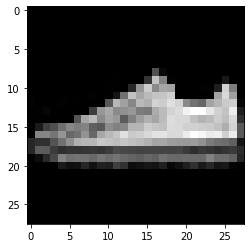

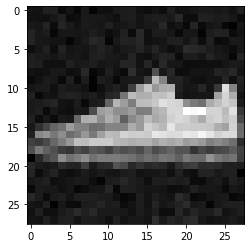

In [ ]:

# Shiffle the dataset
np.random.shuffle(img_database)

X_train = img_database

# Normalzie the dataset
X_train = X_train

# Create a noisy dataset
X_train_noisy = X_train + 10*np.random.normal(0,1,size=X_train.shape)

# Original image
plt.imshow(X_train[0].reshape(28,28), cmap='gray')
plt.show()

# Noisy image
plt.imshow(X_train_noisy[0].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
# Define the metrics

# The loss funciton
computed_loss = tf.reduce_mean(tf.square(NN_output-Y))

# Define the optimizer
optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(computed_loss)

# Initialize the variables
init = tf.global_variables_initializer()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
# Initialize the session

sess = tf.Session()
sess.run(init)

for epoch in range(epochs):
  for i in range(int(total_num_images/batch_size)):
    X_epoch = X_train[ i*batch_size : (i+1)*batch_size ]
    X_noise_epoch = X_train_noisy[ i*batch_size : (i+1)*batch_size ]
    _, loss = sess.run([optimizer, computed_loss], feed_dict = {X:X_noise_epoch, Y: X_epoch})
  print('Epoch', epoch, '/', epochs, 'loss', loss)

# Pick any image
X_actual = X_train[:10]
noisy_image = X_train_noisy[:10]

# Run it through the autoencoder
denoised_image = sess.run(NN_output, feed_dict = {X:noisy_image})

Epoch 0 / 100 loss 4972.8516
Epoch 1 / 100 loss 4488.7075
Epoch 2 / 100 loss 4314.2227
Epoch 3 / 100 loss 4148.1753
Epoch 4 / 100 loss 4002.2473
Epoch 5 / 100 loss 3995.014
Epoch 6 / 100 loss 3964.2605
Epoch 7 / 100 loss 3934.5923
Epoch 8 / 100 loss 3876.1013
Epoch 9 / 100 loss 3882.8298
Epoch 10 / 100 loss 3869.5327
Epoch 11 / 100 loss 3912.3215
Epoch 12 / 100 loss 3856.9673
Epoch 13 / 100 loss 3837.9421
Epoch 14 / 100 loss 3877.7053
Epoch 15 / 100 loss 3873.09
Epoch 16 / 100 loss 3829.885
Epoch 17 / 100 loss 3803.1348
Epoch 18 / 100 loss 3791.5889
Epoch 19 / 100 loss 3759.4817
Epoch 20 / 100 loss 3753.653
Epoch 21 / 100 loss 3740.7935
Epoch 22 / 100 loss 3720.2188
Epoch 23 / 100 loss 3695.8513
Epoch 24 / 100 loss 3689.7107
Epoch 25 / 100 loss 3722.5535
Epoch 26 / 100 loss 3710.4873
Epoch 27 / 100 loss 3717.0103
Epoch 28 / 100 loss 3674.3167
Epoch 29 / 100 loss 3628.8997
Epoch 30 / 100 loss 3654.5625
Epoch 31 / 100 loss 3625.7217
Epoch 32 / 100 loss 3621.483
Epoch 33 / 100 loss 3597.2